In [1]:
import pandas as pd
url = "https://raw.githubusercontent.com/ga-students/SF-DAT-20/master/Data/mtcars.csv"
CarData = pd.read_csv(url)
CarData.head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2


Here is the dictionary of our data: https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/mtcars.html

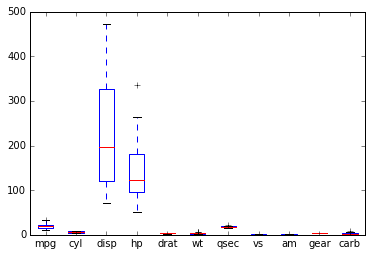

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
CarData.plot(kind = 'box')

In [3]:
Q1_hp = CarData['hp'].quantile(.25)  #Here is first Quartilefor hp
Q3_hp = CarData['hp'].quantile(.75)  #Here is third Quartile for hp
IQR_hp = Q3_hp - Q1_hp

#### Let's get rid of outliers

In [4]:
CarData.drop(CarData[(CarData['hp'] > Q3_hp + 1.5*IQR_hp) |
                     (CarData['hp'] < Q1_hp - 1.5*IQR_hp) ].index
                        , inplace = True)

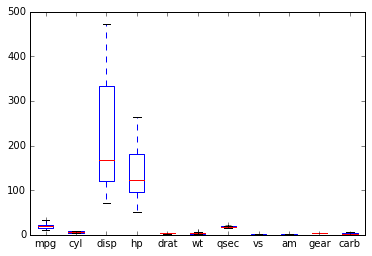

In [5]:
CarData.plot(kind = 'box')

#### Great! We have an outlier free dataset to work with!

## First: Create a correlation matrix and explore it

In [6]:
CarData.corr().abs()<0.3

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,False,False,False,False,False,False,False,False,False,False,False
cyl,False,False,False,False,False,False,False,False,False,False,False
disp,False,False,False,False,False,False,False,False,False,False,False
hp,False,False,False,False,False,False,False,False,False,False,False
drat,False,False,False,False,False,False,True,False,False,False,True
wt,False,False,False,False,False,False,True,False,False,False,False
qsec,False,False,False,False,True,True,False,False,True,True,False
vs,False,False,False,False,False,False,False,False,True,True,False
am,False,False,False,False,False,False,True,True,False,False,True
gear,False,False,False,False,False,False,True,True,False,False,True


#### What do we learn from this Corr() Matrix?

Answer: Many of the dimensions are highly correlated with one another

### Let's draw scatter plot and regression plot of Mileage Per Gallon (y) vs horse power (x)

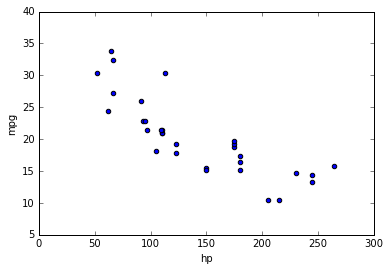

In [7]:
#Scatter plot
CarData.plot(kind='scatter',x='hp',y='mpg')

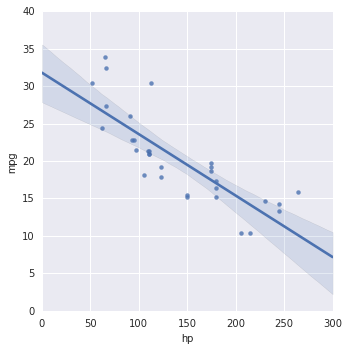

In [8]:
#regression plot
import seaborn as sns
sns.lmplot(x='hp',y='mpg',data=CarData)

#### How do you interpret these graphs?

Answer: There is a linear relationship between hp and mpg

#### Now let's find build a regression line. Use hp to predict mpg

In [9]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [10]:
X = CarData[['hp']]
y = CarData['mpg']

In [11]:
linreg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
print(linreg.intercept_)
print(linreg.coef_)

31.7917856473
[-0.08204757]


#### Write down the formula for your regression line

Answer: mpg = 31.79 * -0.082*hp

#### Interpret the coefficient of hp

Answer: For every increase in horsepower of a car, the miles per gallon of the engine will decrease by 0.08 on average

#### Let's make predictions for two cars VW Jetta and Bugatti Veyron . VW jetta has 170 hp and Bugatti Veyron has 1200 hp. What are your predictions for these two cars?

In [13]:
linreg.predict(170)

array([ 17.84369885])

In [14]:
linreg.predict(1200)

array([-66.66529765])

Answer: The VW will have an efficiency of 17.84 miles per gallon while the Bugatti will have an efficiency of -66.66 miles per gallon. The Bugatti hp is outside the range of training data.

#### Now let's work with categorical data

Let's first create dummy variables for weight of cars. Let's categorize Cars based on weight. Those cars that are heavier than 75% of cars are going to be called "Heavy", those which are heavier than 25% of cars but lighter than the heaviest 25% cars are going to be Called "Medium" and finally, the lightest 25% cars are called "Light".

In [16]:
mask_Heavy = CarData['wt'] > CarData['wt'].quantile(0.75)
mask_Light = (CarData['wt'] < CarData['wt'].quantile(0.25))
CarData['wt_category'] = 'Medium'
CarData.loc[mask_Heavy,'wt_category'] = 'Heavy'
CarData.loc[mask_Light,'wt_category'] = 'Light'
CarData.head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,wt_category
0,Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4,Medium
1,Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4,Medium
2,Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1,Light
3,Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1,Medium
4,Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2,Medium


In [17]:
WeightDummy = pd.get_dummies(CarData.wt_category)
del WeightDummy['Light']
CarData = pd.concat([CarData,WeightDummy],axis = 1)
CarData.head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,wt_category,Heavy,Medium
0,Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4,Medium,0,1
1,Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4,Medium,0,1
2,Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1,Light,0,0
3,Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1,Medium,0,1
4,Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2,Medium,0,1


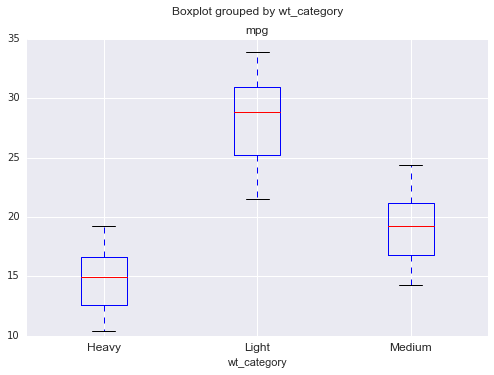

In [18]:
#Now let's visualize association between mpg and weight
CarData.boxplot(column = 'mpg', by = 'wt_category') 

#### Does the abox boxplot make sense? Why it does or why it does not?

Answer: 

#### Apply a multivariable regression line to discover relationship between mpg and weight categories. Print your outcomes.

In [19]:
multireg = LinearRegression()

In [20]:
X = CarData[['Heavy','Medium']]
y = CarData['mpg']

In [21]:
multireg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [22]:
print(multireg.intercept_)
print(multireg.coef_)

28.0875
[-13.475       -9.00083333]


#### Write your regression line

Answer: mpg = 28.08 - 13.48*Heavy - 9.00*Medium

#### Please interpret your above results

Answer: Light has the highest mpg of any category, and the mpg decreases for medium and heavy vehicles

** Without using the predict function, predict the average mpg of light, heavy and medium cars **

Answer:
Light = 28.08 mpg
Medium = 19.08 mpg
Heavy = 14.61 mpg

** Now let's use predict function to predict mpg for light, heavy and medium cars **

In [23]:
# Light car
multireg.predict([0,0])

/Users/benstan/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([ 28.0875])

In [24]:
# Medium car
multireg.predict([0,1])

/Users/benstan/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([ 19.08666667])

In [25]:
# Heavy car
multireg.predict([1,0])

/Users/benstan/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([ 14.6125])